# Paper Trading Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# for future charts
plt.style.use("ggplot")

## 1. Data Loading and Cleaning

In [ ]:
# load the transaction file
df = pd.read_csv("transactions.csv")

# convert date column to datetime objects to sort properly
df["date"] = pd.to_datetime(df["date"])

# display the first 5 rows to just check the dataframe
df.head()

,type,stock,amount,date
0,Dividend,GraniteShares 2x Short TSLA Daily ETF,390.60,2025-12-29
1,Stock buy fee,Alphabet-A,-0.99,2025-12-26
2,Stock buy,Alphabet-A,-25065.60,2025-12-26
3,Stock buy fee,Microsoft,-0.99,2025-12-26
4,Stock buy,Microsoft,-24357.00,2025-12-26


Loads the CSV file and converts the dates into a format that Python can use for sorting and analysis.

## 2.Total amount of Stocks bought

In [ ]:
# create a new dataframe containing only "Stock buy" transactions
buys = df[df["type"] == "Stock buy"]

# calculate the sum of the "amount" column in the new "buys" group
total_invested = buys["amount"].sum()

# display the result
print(f"Total Money Invested: ${total_invested:,.2f}")

Total Money Invested: $-171,584.85


Total money spent on purchasing the stocks

## 3. Total amount of fees paid

In [ ]:
# create a new dataframe containing only "Stock buy fee" transactions
fees_df = df[df["type"] == "Stock buy fee"]

# sum of the fee amounts
total_fees = fees_df["amount"].sum()

# displaying the result
print(f"Total Fees Paid: ${total_fees:,.2f}")

Total Fees Paid: $-88.05


Total fees paid for purchase of stocks

## 4. Total amount Dividends recieved

In [ ]:
# create a new dataframe containing only "Dividend" transactions
div_df = df[df["type"] == "Dividend"]

# sum of the dividend amounts
total_div = div_df["amount"].sum()

# displaying the result
print(f"Total Dividends Received: ${total_div:,.2f}")

Total Dividends Received: $557.31


Total amount of dividends received from when certain companies declared dividends to shareholders

## 5. Portfolio Breakdown

In [ ]:
# group the "buys" data by stock name and sum the amounts into a series
stock_investments = buys.groupby("stock")["amount"].sum()

# display the series
stock_investments

stock
Alphabet-A                              -25065.60
Apple                                   -19599.00
Figma Inc                               -17962.00
GraniteShares 2x Short TSLA Daily ETF   -20893.80
Microsoft                               -24357.00
NVIDIA                                  -10411.50
Palantir                                -13976.00
SPDR S&P 500 ETF                        -12027.00
Shopify                                 -15492.95
TMC the metals                          -11800.00
Name: amount, dtype: float64

Groups the data by stock to see how much capital is in each company

## 6. Sorting and Visualization

In [20]:
# sort the series from largest investment to smallest
sorted_investments = stock_investments.sort_values()

# display the sorted list
sorted_investments

stock
Alphabet-A                              -25065.60
Microsoft                               -24357.00
GraniteShares 2x Short TSLA Daily ETF   -20893.80
Apple                                   -19599.00
Figma Inc                               -17962.00
Shopify                                 -15492.95
Palantir                                -13976.00
SPDR S&P 500 ETF                        -12027.00
TMC the metals                          -11800.00
NVIDIA                                  -10411.50
Name: amount, dtype: float64

Sorting the data by stocks with most invested capital to least

## 7. Visualizing Investment Distribution

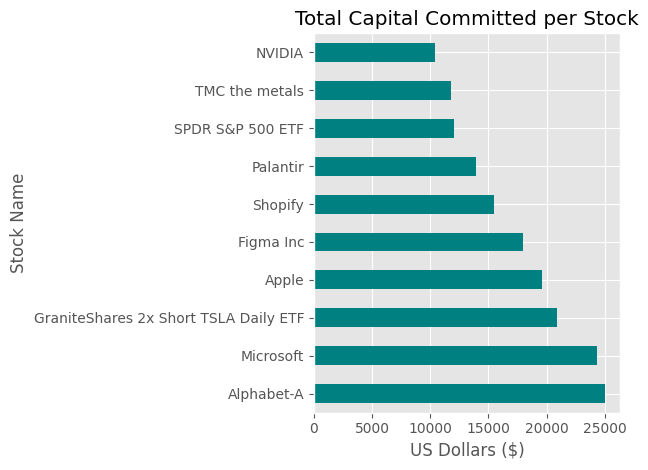

In [ ]:
# here i am creating a horizontal bar chart of my papertrading investments
# use .abs() so the bars represent the value of the investment
sorted_investments.abs().plot(kind="barh", color="teal")

# adding some context to the chart
plt.title("Total Capital Committed per Stock")
plt.xlabel("US Dollars ($)")
plt.ylabel("Stock Name")

# this just cleans up the layout so labels don"t get cut off
plt.tight_layout()

Can visually see that most of the portfolio is concentrated in Alphabet and Microsoft.

## 8. Cumulative Investment Over Time

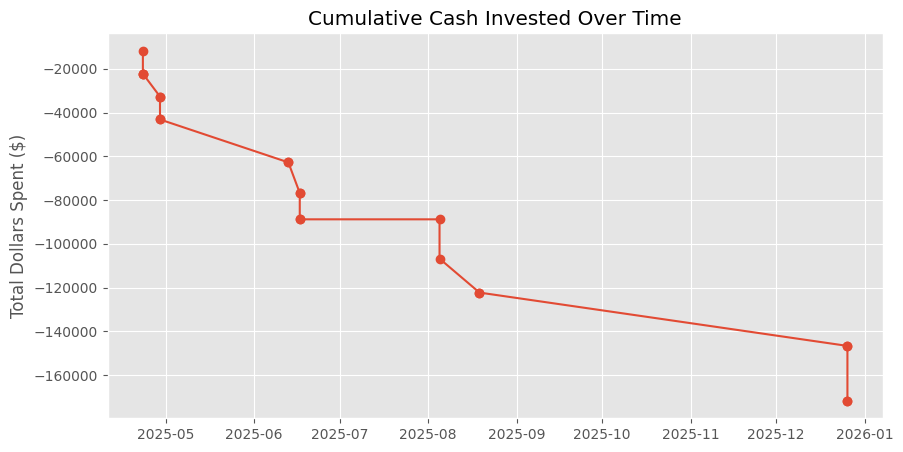

In [ ]:
# sorting the entire dataframe by date to ensure the timeline is chronological
df = df.sort_values("date")

# filtering for buys and fees to see the total "Cash Out"
cash_out = df[df["type"].isin(["Stock buy", "Stock buy fee"])].copy()

# ceating a "running_total" column using cumsum()
cash_out["running_total"] = cash_out["amount"].cumsum()

# plotting the results
plt.figure(figsize=(10, 5))
plt.plot(cash_out["date"], cash_out["running_total"], marker="o", linestyle="-")
plt.title("Cumulative Cash Invested Over Time")
plt.ylabel("Total Dollars Spent ($)")
plt.grid(True)

Investment Timeline: This chart shows the total money spent on stocks and fees over times

    Overall Trend: A steady decline showing regular investing

    Major Trades: The large "drops" represent the biggest purchases (like Alphabet and Microsoft)

    Total Invested: ~$171,584

## 9. Dividend Breakdown by Stock

In [ ]:
# trying to fill in the blanks based on the previous "buys" grouping
stock_dividends = div_df.groupby("stock")["amount"].sum().sort_values(ascending=False)

# display the top dividend payers
stock_dividends.head()

stock
GraniteShares 2x Short TSLA Daily ETF    390.60
SPDR S&P 500 ETF                         111.71
Apple                                     52.00
NVIDIA                                     3.00
Name: amount, dtype: float64

Identifies which stocks pay the most and calculates the yield to see the return on investment.

    Leader: GraniteShares has the highest yield at 1.87%.

## 10. Calculating Dividend Yield

In [26]:
# calculate the percentage yield for each stock
# divide the dividends by the absolute value of investments
yields = (stock_dividends / stock_investments.abs()) * 100

# sort by the highest yield and show the top 5
yields.sort_values(ascending=False).head()

stock
GraniteShares 2x Short TSLA Daily ETF    1.869454
SPDR S&P 500 ETF                         0.928827
Apple                                    0.265320
NVIDIA                                   0.028814
Alphabet-A                                    NaN
Name: amount, dtype: float64

Determining the Dividend Yield of the companies that issued dividends

## 11. Final Comparison: Income vs. Costs

In [27]:
# calculating net dividend income
net_dividend_income = total_div + total_fees

print(f"Total Dividends:  ${total_div:,.2f}")
print(f"Total Fees:      ${total_fees:,.2f}")
print(f"--------------------------")
print(f"Net Income:       ${net_dividend_income:,.2f}")

Total Dividends:  $557.31
Total Fees:      $-88.05
--------------------------
Net Income:       $469.26


Compares the dividend income against the trading fees to find the net profit.

    Result: Dividends covered 100% of the fees, leaving a profit of about $469.

## Intsalling libraries

In [ ]:
#!pip install pandas
#!pip install openpyxl
#!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 10.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 9.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 15.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 13.4 MB/s eta 0:00:00
